In [9]:
# Needed for functions
import numpy as np
import time
from copy import deepcopy
from numpy import pi
# Import Qiskit classes
import qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.providers.aer import noise
from qiskit.compiler import assemble

# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

# Auxiliary methods
from qiskit.quantum_info import Choi, Kraus
from qiskit.extensions import HGate, XGate

In [10]:
qreg_q = QuantumRegister(5, 'q')
circuit = QuantumCircuit(qreg_q)


circuit.rx(pi/2, qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[3])

circuit.cz(qreg_q[0], qreg_q[4])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.cx(qreg_q[2], qreg_q[4])
circuit.cz(qreg_q[3], qreg_q[4])



circuit.rx(-pi/2, qreg_q[4])

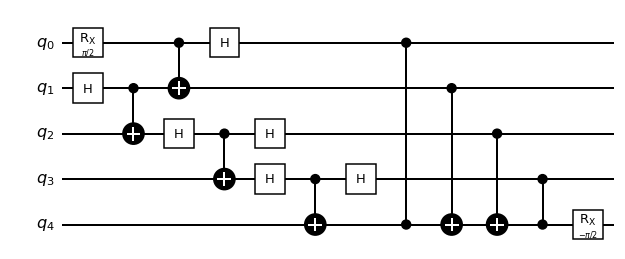

In [11]:
circuit.draw('mpl',style='bw')

In [12]:
ideal_state = [1, 0]


In [13]:
# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_circuit = state_tomography_circuits(circuit, qreg_q[4])

# Execute
job = qiskit.execute(qst_circuit, Aer.get_backend('qasm_simulator'), shots=5000)
print('Time taken:', time.time() - t)

# Fit result
circ_fitter_teleport = StateTomographyFitter(job.result(), qst_circuit)

Time taken: 1.4621973037719727


In [14]:
# Perform the tomography fit
# which outputs a density matrix
rho_fit_circ = circ_fitter_teleport.fit(method='lstsq')
F_circ = qi.state_fidelity(rho_fit_circ, ideal_state)
print('State Fidelity: F = {:.5f}'.format(F_circ))

State Fidelity: F = 0.99988


[[9.99880683e-01+0.j         9.99761365e-03+0.00439895j]
 [9.99761365e-03-0.00439895j 1.19317277e-04+0.j        ]]


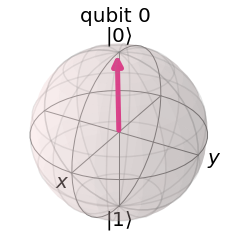

In [16]:
from qiskit.visualization import plot_bloch_multivector
rho = qi.DensityMatrix(rho_fit_circ)
print(rho.data)
plot_bloch_multivector(rho.data)

In [17]:
# LOGGING IN IBM ACC
from qiskit import IBMQ
IBMQ.save_account("5ae112e77d4b1347061e63fb7ca749e7a37af2e6a5e69e9676647159479f824d948d66d032193d1840200fa870dafe3c236556fcf4a8737037858e12e2669e21")

configrc.store_credentials:WARNING:2022-04-11 16:11:59,321: Credentials already present. Set overwrite=True to overwrite.


In [43]:

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila') 

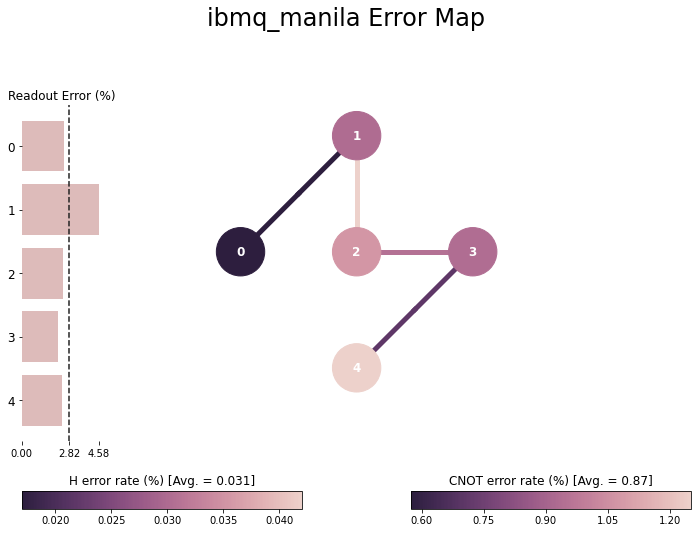

In [44]:
qiskit.visualization.plot_error_map(backend)

In [45]:
optimized_circuit = qiskit.transpile(circuit, backend)

In [ ]:
# Запуск программы на реальном устройстве
job = backend.run(optimized_circuit)
retrieved_job = backend.retrieve_job(job.job_id())
result = retrieved_job.result() 
print(result.get_counts()) 

In [46]:
# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_circuit = state_tomography_circuits(circuit, qreg_q[4])

# Execute
job = qiskit.execute(qst_circuit, backend = backend , shots=5000)
print('Time taken:', time.time() - t)

# Fit result
circ_fitter_teleport = StateTomographyFitter(job.result(), qst_circuit)

Time taken: 5.076499700546265


In [49]:
# Perform the tomography fit
# which outputs a density matrix
rho_fit_telep = circ_fitter_teleport.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_telep, ideal_state)
print('State Fidelity: F = {:.5f}'.format(F_bell))

State Fidelity: F = 0.55440


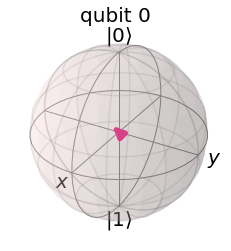

In [52]:
from qiskit.visualization import plot_bloch_multivector
rho = qi.DensityMatrix(rho_fit_telep)
plot_bloch_multivector(rho.data)

In [53]:
backend = provider.get_backend('ibmq_bogota') 

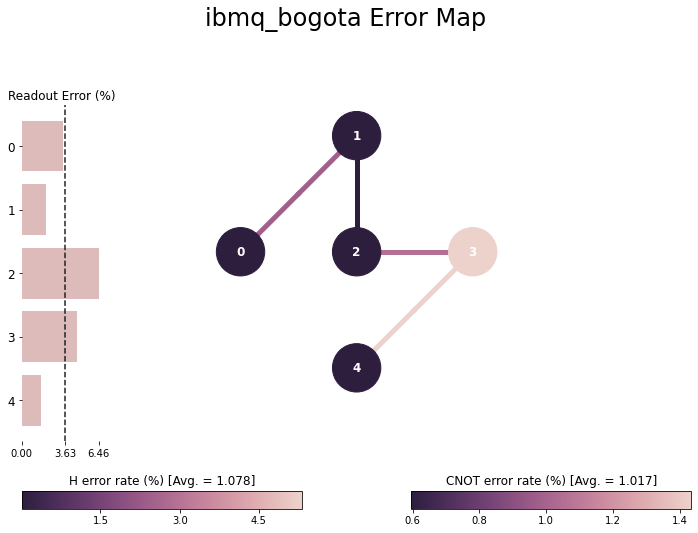

In [54]:
qiskit.visualization.plot_error_map(backend)

In [55]:
# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_circuit = state_tomography_circuits(circuit, qreg_q[4])

# Execute
job = qiskit.execute(qst_circuit, backend = backend , shots=5000)
print('Time taken:', time.time() - t)

# Fit result
circ_fitter_teleport = StateTomographyFitter(job.result(), qst_circuit)

Time taken: 29.847862720489502


In [56]:
# Perform the tomography fit
# which outputs a density matrix
rho_fit_telep = circ_fitter_teleport.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_telep, ideal_state)
print('State Fidelity: F = {:.5f}'.format(F_bell))

State Fidelity: F = 0.69300


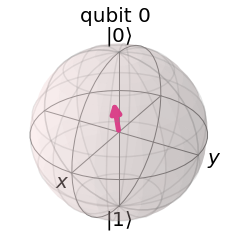

In [57]:
rho = qi.DensityMatrix(rho_fit_telep)
plot_bloch_multivector(rho.data)

In [19]:
#Т- тип кластера 

In [22]:
qreg_q = QuantumRegister(5, 'q')
circuit = QuantumCircuit(qreg_q)

circuit.rx(pi/2, qreg_q[0])
# circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[4], qreg_q[3])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
# circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[4])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[2], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.rx(-pi/2, qreg_q[4])

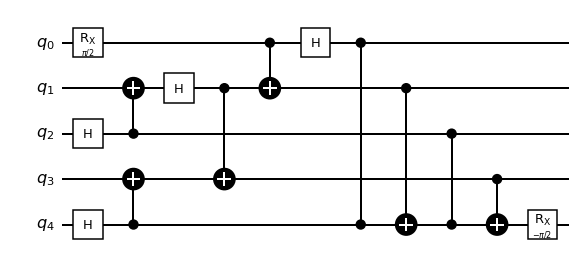

In [24]:
circuit.draw('mpl',style='bw')

In [25]:
# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_circuit = state_tomography_circuits(circuit, qreg_q[4])

# Execute
job = qiskit.execute(qst_circuit, Aer.get_backend('qasm_simulator'), shots=5000)
print('Time taken:', time.time() - t)

# Fit result
circ_fitter_teleport = StateTomographyFitter(job.result(), qst_circuit)

Time taken: 0.054506778717041016


In [26]:
# Perform the tomography fit
# which outputs a density matrix
rho_fit_circ = circ_fitter_teleport.fit(method='lstsq')
F_circ = qi.state_fidelity(rho_fit_circ, ideal_state)
print('State Fidelity: F = {:.5f}'.format(F_circ))

State Fidelity: F = 0.99984


[[ 9.99838758e-01+0.j         -1.13963237e-02+0.00559819j]
 [-1.13963237e-02-0.00559819j  1.61241970e-04+0.j        ]]


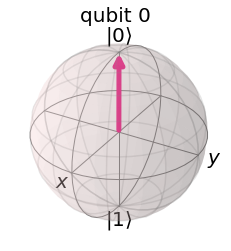

In [29]:
from qiskit.visualization import plot_bloch_multivector
rho = qi.DensityMatrix(rho_fit_circ)
print(rho.data)
plot_bloch_multivector(rho.data)

In [30]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito') 

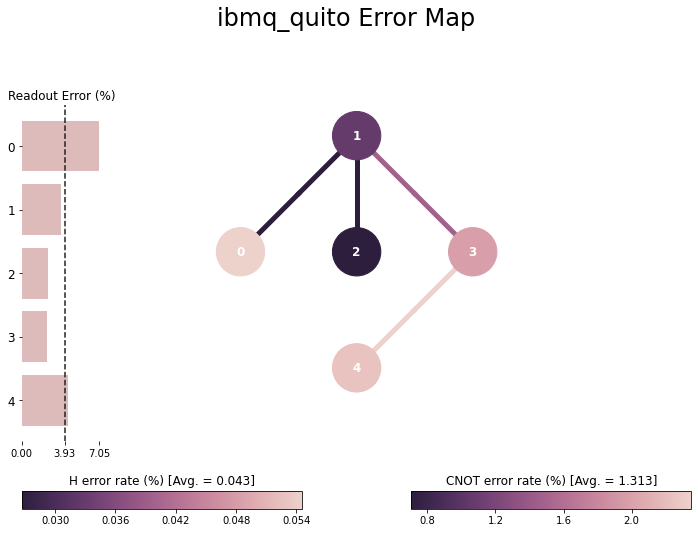

In [31]:
qiskit.visualization.plot_error_map(backend)

In [32]:
optimized_circuit = qiskit.transpile(circuit, backend)

In [33]:
# Запуск программы на реальном устройстве
job = backend.run(optimized_circuit)
retrieved_job = backend.retrieve_job(job.job_id())
result = retrieved_job.result() 
print(result.get_counts()) 

{}


In [34]:
# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_circuit = state_tomography_circuits(circuit, qreg_q[4])

# Execute
job = qiskit.execute(qst_circuit, backend = backend , shots=5000)
print('Time taken:', time.time() - t)

# Fit result
circ_fitter_teleport = StateTomographyFitter(job.result(), qst_circuit)

Time taken: 2.2388787269592285


In [35]:
# Perform the tomography fit
# which outputs a density matrix
rho_fit_telep = circ_fitter_teleport.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_telep, ideal_state)
print('State Fidelity: F = {:.5f}'.format(F_bell))

State Fidelity: F = 0.63600


[[ 0.636 +0.j     -0.0586-0.0238j]
 [-0.0586+0.0238j  0.364 +0.j    ]]


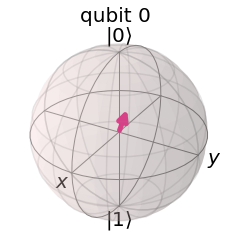

In [37]:
from qiskit.visualization import plot_bloch_multivector
rho = qi.DensityMatrix(rho_fit_telep)
print(rho.data)
plot_bloch_multivector(rho.data)

In [ ]:
# GHZ test

In [38]:
qreg_q = QuantumRegister(5, 'q')
circuit = QuantumCircuit(qreg_q)

circuit.rx(pi/2, qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
# circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[4])
circuit.rx(-pi/2, qreg_q[4])
# circuit.measure(qreg_q[4], creg_c[0])

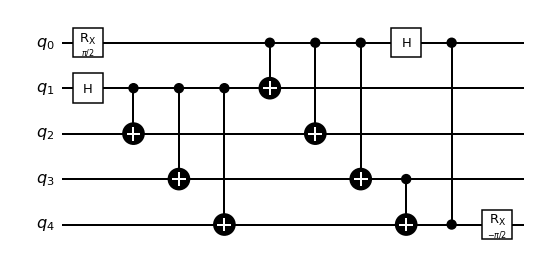

In [39]:
circuit.draw('mpl',style='bw')

In [40]:
# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_circuit = state_tomography_circuits(circuit, qreg_q[4])

# Execute
job = qiskit.execute(qst_circuit, Aer.get_backend('qasm_simulator'), shots=5000)
print('Time taken:', time.time() - t)

# Fit result
circ_fitter_teleport = StateTomographyFitter(job.result(), qst_circuit)

Time taken: 0.0441594123840332


In [41]:
# Perform the tomography fit
# which outputs a density matrix
rho_fit_circ = circ_fitter_teleport.fit(method='lstsq')
F_circ = qi.state_fidelity(rho_fit_circ, ideal_state)
print('State Fidelity: F = {:.5f}'.format(F_circ))

State Fidelity: F = 1.00000


[[9.99996440e-01+0.j         1.59998861e-03+0.00099999j]
 [1.59998861e-03-0.00099999j 3.55996198e-06+0.j        ]]


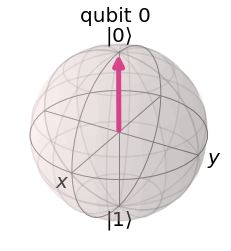

In [42]:
from qiskit.visualization import plot_bloch_multivector
rho = qi.DensityMatrix(rho_fit_circ)
print(rho.data)
plot_bloch_multivector(rho.data)

In [44]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito') 

ibmqfactory.load_account:WARNING:2022-04-11 16:30:28,581: Credentials are already in use. The existing account in the session will be replaced.


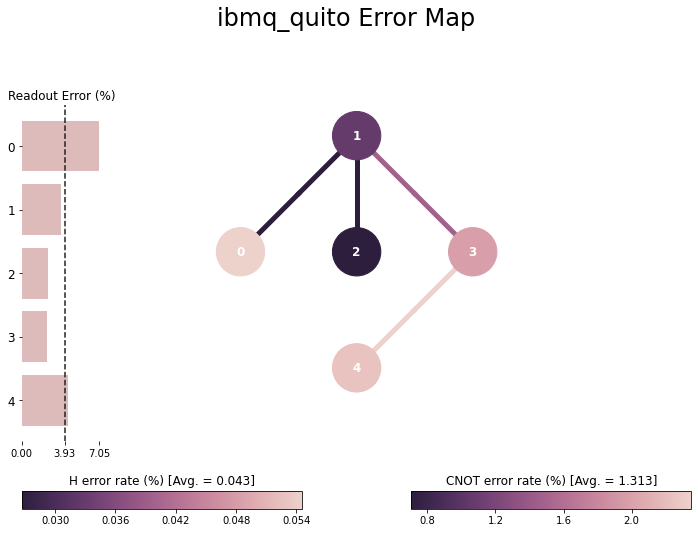

In [45]:
qiskit.visualization.plot_error_map(backend)

In [46]:
optimized_circuit = qiskit.transpile(circuit, backend)

In [47]:
# Запуск программы на реальном устройстве
job = backend.run(optimized_circuit)
retrieved_job = backend.retrieve_job(job.job_id())
result = retrieved_job.result() 
print(result.get_counts()) 

{}


In [48]:
# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_circuit = state_tomography_circuits(circuit, qreg_q[4])

# Execute
job = qiskit.execute(qst_circuit, backend = backend , shots=5000)
print('Time taken:', time.time() - t)

# Fit result
circ_fitter_teleport = StateTomographyFitter(job.result(), qst_circuit)

Time taken: 3.0997986793518066


In [49]:
# Perform the tomography fit
# which outputs a density matrix
rho_fit_telep = circ_fitter_teleport.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_telep, ideal_state)
print('State Fidelity: F = {:.5f}'.format(F_bell))

State Fidelity: F = 0.68820


[[0.6882+0.j     0.059 -0.0602j]
 [0.059 +0.0602j 0.3118+0.j    ]]


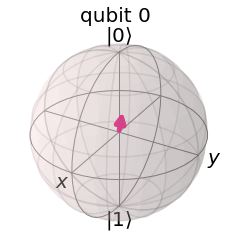

In [50]:
from qiskit.visualization import plot_bloch_multivector
rho = qi.DensityMatrix(rho_fit_telep)
print(rho.data)
plot_bloch_multivector(rho.data)

In [51]:
backend = provider.get_backend('ibmq_bogota') 

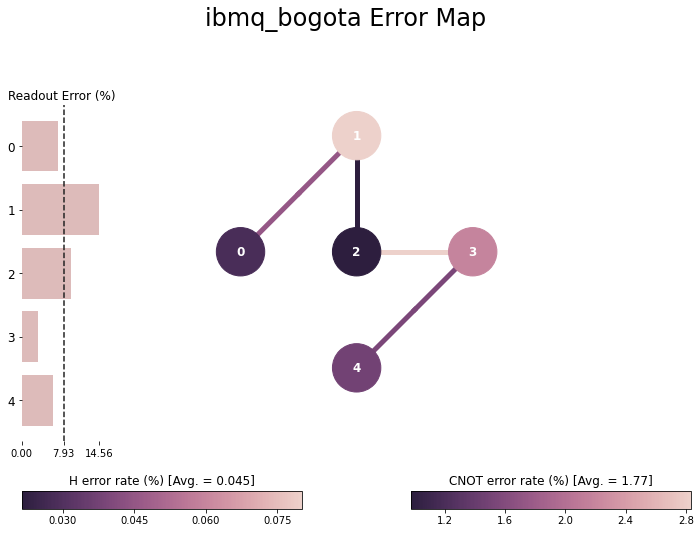

In [52]:
qiskit.visualization.plot_error_map(backend)

In [53]:
optimized_circuit = qiskit.transpile(circuit, backend)

In [54]:
# Запуск программы на реальном устройстве
job = backend.run(optimized_circuit)
retrieved_job = backend.retrieve_job(job.job_id())
result = retrieved_job.result() 
print(result.get_counts()) 

{}


In [55]:
# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_circuit = state_tomography_circuits(circuit, qreg_q[4])

# Execute
job = qiskit.execute(qst_circuit, backend = backend , shots=5000)
print('Time taken:', time.time() - t)

# Fit result
circ_fitter_teleport = StateTomographyFitter(job.result(), qst_circuit)

Time taken: 1.6204500198364258


In [56]:
# Perform the tomography fit
# which outputs a density matrix
rho_fit_telep = circ_fitter_teleport.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_telep, ideal_state)
print('State Fidelity: F = {:.5f}'.format(F_bell))

State Fidelity: F = 0.57020


[[0.5702+0.j     0.0354+0.1594j]
 [0.0354-0.1594j 0.4298+0.j    ]]


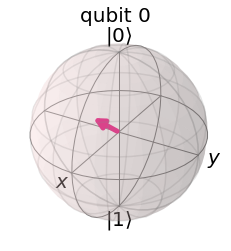

In [57]:
from qiskit.visualization import plot_bloch_multivector
rho = qi.DensityMatrix(rho_fit_telep)
print(rho.data)
plot_bloch_multivector(rho.data)